- Course Name:    Computer Vision
- Course Code:	19AI621
- Course Advisor: Dr. Senthilkumar T
- Title:	Lane Detection for Autonomous Vehicles using Computer Vision Algorithm
- Submitted By:
    - Abhishek Gopinath [CB.EN.P2AID20002]
    - Alan Henry [CB.EN.P2AID20010]
    - Jiss Joseph Thomas [CB.EN.P2AID20024]


In [3]:
from math import log10, sqrt 
import cv2 
import numpy as np
import os, sys, stat

from numpy import *
from numpy import random
from scipy.ndimage import filters

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


Importing Image

In [4]:
image = "test_image.png"

In [7]:
im = cv2.imread(image,0) 

## Spatial Domain Operations

### Image Smoothing

#### Average Filter

In [8]:
m, n = im.shape

# Develop Averaging filter(3, 3) mask 
mask = np.ones([3, 3], dtype = np.float32) 
mask = mask / 9
   
# Convolve the 3x3 mask over the image  
img_new = np.zeros([m, n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = im[i-1, j-1]*mask[0, 0]+im[i-1, j]*mask[0, 1]+im[i-1, j + 1]*mask[0, 2]+im[i, j-1]*mask[1, 0]+ im[i, j]*mask[1, 1]+im[i, j + 1]*mask[1, 2]+im[i + 1, j-1]*mask[2, 0]+im[i + 1, j]*mask[2, 1]+im[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= temp 
          
img_new = img_new.astype(np.uint8) 


In [12]:
cv2.imwrite("AverageFilter.png",img_new)

True

(<matplotlib.axes._subplots.AxesSubplot at 0x19e5e5c2550>,
 Text(0.5, 1.0, 'Enhanced'))

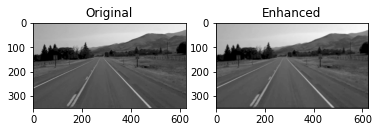

In [10]:
plt.subplot(121),plt.imshow(im, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img_new, cmap='gray'),plt.title('Enhanced')

#### Weighted Average Filter

In [13]:
m, n = im.shape
mask = np.ones([3, 3], dtype = np.float32)
mask[0, 1] = mask[1, 0] = mask[2, 1] = mask[1, 2]= 2
mask[1, 1] = 8
mask = mask / sum(mask)
img_new2 = np.zeros([m, n])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = im[i-1, j-1]*mask[0, 0]+im[i-1, j]*mask[0, 1]+im[i-1, j + 1]*mask[0, 2]+im[i, j-1]*mask[1, 0]+ im[i, j]*mask[1, 1]+im[i, j + 1]*mask[1, 2]+im[i + 1, j-1]*mask[2, 0]+im[i + 1, j]*mask[2, 1]+im[i + 1, j + 1]*mask[2, 2]
        img_new2[i, j]= temp
img_new2 = img_new2.astype(np.uint8)

In [25]:
cv2.imwrite("WeightedAverageFilter.png",img_new2)

True

(<matplotlib.axes._subplots.AxesSubplot at 0x19e67d14700>,
 Text(0.5, 1.0, 'Enhanced'))

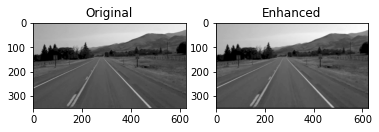

In [30]:
plt.subplot(121),plt.imshow(im, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img_new2, cmap='gray'),plt.title('Enhanced')

#### Gaussian Blurring

In [16]:
blur = cv2.GaussianBlur(im,(3,3),0)

In [26]:
cv2.imwrite("GaussianFilter.png",blur)

True

(<matplotlib.axes._subplots.AxesSubplot at 0x19e6681d430>,
 Text(0.5, 1.0, 'Enhanced'))

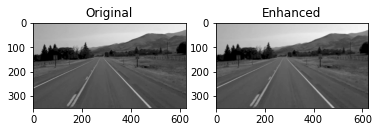

In [22]:
plt.subplot(121),plt.imshow(im, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Enhanced')

#### Median Filter

In [20]:
m, n = im.shape 

# Traverse the image. For every 3X3 area,  
# find the median of the pixels and 
# replace the ceter pixel by the median 
median = np.zeros([m, n]) 

for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [im[i-1, j-1], 
               im[i-1, j], 
               im[i-1, j + 1], 
               im[i, j-1], 
               im[i, j], 
               im[i, j + 1], 
               im[i + 1, j-1], 
               im[i + 1, j], 
               im[i + 1, j + 1]] 

        temp = sorted(temp) 
        median[i, j]= temp[4]

median1 = median.astype(np.uint8)

In [27]:
cv2.imwrite("MedianFilter.png",median1)

True

(<matplotlib.axes._subplots.AxesSubplot at 0x19e6694cf40>,
 Text(0.5, 1.0, 'Enhanced'))

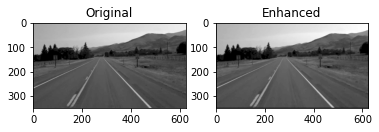

In [28]:
plt.subplot(121),plt.imshow(im, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(median1, cmap='gray'),plt.title('Enhanced')

### Image Sharpening

Enter the kernal mask (4/-4/8/-8):-8


Image after sharpening


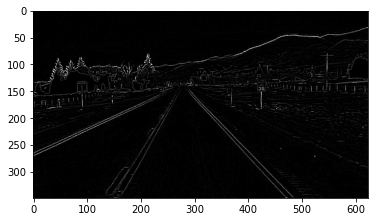

In [34]:
n = int(input("Enter the kernal mask (4/-4/8/-8):"))
if (n == 4 or n == -4): 
    kernel = np.array([[0, -n/4, 0],
                      [-n/4, n, -n/4],
                      [0, -n/4, 0]])
elif(n == 8 or n == -8): 
    kernel = np.array([[-n/8, -n/8, -n/8],
                      [-n/8, n, -n/8],
                      [-n/8, -n/8, -n/8]])
else:
    print("You have chosen wrong input")
dst = cv2.filter2D(im, -1, kernel)
print("\n\nImage after sharpening")
plt.imshow(dst, cmap='gray')

In [35]:
cv2.imwrite("ImageSharpen.png",dst)

True

(<matplotlib.axes._subplots.AxesSubplot at 0x19e67d07850>,
 Text(0.5, 1.0, 'Enhanced'))

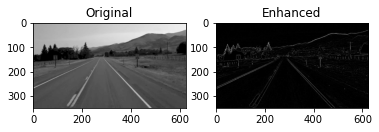

In [36]:
plt.subplot(121),plt.imshow(im, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(dst, cmap='gray'),plt.title('Enhanced')

#### Roberts and Sobel Filters

In [37]:
from skimage import filters

In [39]:
edge_roberts = filters.roberts(im)
edge_sobel = filters.sobel(im)


In [41]:
cv2.imwrite("RobertsFilter.png",edge_roberts)
cv2.imwrite("SobelFilter.png",edge_sobel)

True

#### Gamma Transform

In [43]:
gamma_corrected = np.array(255*(im / 255) ** 1.2, dtype = 'uint8') 

In [44]:
cv2.imwrite("GammaTransform.png",gamma_corrected)

True